In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%cd -q ..

In [5]:
import lcpfn 
import numpy as np
from matplotlib import pyplot as plt

## Generate samples from LC prior

(0.0, 1.0)

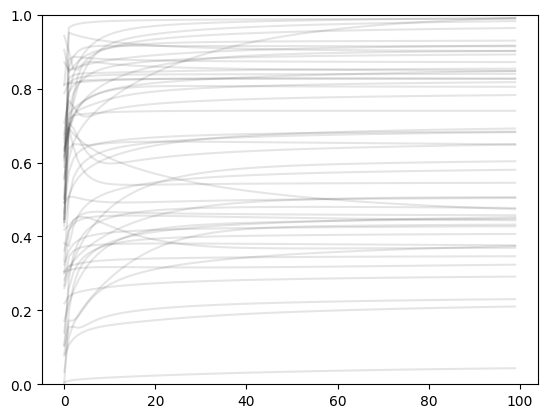

In [6]:
for _ in range(50):
    prior = lcpfn.sample_from_prior(np.random)
    curve, _ = prior()
    plt.plot(curve, "black", alpha=0.1)
plt.ylim(0, 1)

## Train a PFN model with the previous learning curve prior

In [7]:
get_batch_func = lcpfn.create_get_batch_func(prior=lcpfn.sample_from_prior)

In [10]:
# example of a batch

X, Y, Y_noisy = get_batch_func(batch_size=100, seq_len=100, num_features=1)
print(X.shape, Y.shape, Y_noisy.shape)

torch.Size([100, 100, 1]) torch.Size([100, 100]) torch.Size([100, 100])


In [7]:
# Main function to train a PFN model

lcpfn.train_lcpfn

<function lcpfn.train_lcpfn.train_lcpfn(get_batch_func, seq_len: int = 100, emsize: int = 512, nlayers: int = 12, num_borders: int = 1000, lr: float = 0.001, batch_size: int = 100, epochs: int = 1000)>

In [8]:
# train a small model for 3 epochs

result = lcpfn.train_lcpfn(get_batch_func=get_batch_func, 
                          seq_len=100,
                         emsize=256,
                         nlayers=3,
                         num_borders=1000,
                         lr=0.001,
                         batch_size=10,
                         epochs=3)

Using 1000000 y evals to estimate 1000 buckets. Cut off the last 0 ys.
Using cpu:0 device
init dist
Not using distributed
DataLoader.__dict__ {'num_steps': 100, 'get_batch_kwargs': {'batch_size': 10, 'eval_pos_seq_len_sampler': <function train.<locals>.eval_pos_seq_len_sampler at 0x71943ee10ee0>, 'seq_len_maximum': 100, 'device': 'cpu:0', 'num_features': 1, 'hyperparameters': {}}, 'num_features': 1}
Style definition: None
Using a Transformer with 2.23 M parameters


/home/patrik/anaconda3/envs/lenv/lib/python3.9/site-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/home/patrik/new/dl/reproducibility/deep-learning-project/lcpfn/bar_distribution.py:22: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at  ../aten/src/ATen/native/BucketizationUtils.h:28.)
  target_sample = torch.searchsorted(self.borders, y) - 1


-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 270.87s | mean loss -0.58 | pos losses   nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,-0.49,-0.13,-0.88,-0.58,-0.22,  nan,-0.69,-0.38,  nan,  nan,  nan,-0.76,-0.71,-0.54,-0.20,  nan,-0.67,-0.41,-0.48,  nan,-0.58,  nan,-0.35,-1.06,-0.62,-0.76,-0.34,-1.11,-0.56,-0.62,  nan,-0.67,  nan,-0.58,  nan,-1.07,-0.86,-0.15,-0.45,  nan,-0.41,  nan,-1.26,-0.91,-0.69,-0.78,  nan,-0.75,-0.44,  nan,-0.92,  nan,  nan,-0.98,-0.09,-0.15,  nan,  nan,  nan,-0.64,-0.83,-0.86,-0.71,  nan,-0.54,  nan,-0.87,-0.51,  nan,-0.67,  nan,-0.25,  nan,  nan,-0.68,-0.49,-0.68,-0.38,  nan,-0.24,-0.52,-0.54,-0.58,  nan,-0.48,-0.92,-0.59,  nan,-0.54,-0.28,-0.62,  nan, lr 0.001 data time  0.00 step time  2.93 forward time  1.22
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
| e

In [9]:
# Get the trained model

model = result[2]
print(model)

TransformerModel(
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dro